In [1]:
from main import *
m = bi(platform='cpu')
m.data('../data/Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(['weight'])
m.data_to_model(['weight', 'height'])

def model(weight):
    a = yield bi.dist.normal(178, 20, shape = 1)
    b = yield bi.dist.normal(0, 1, shape = 1)  
    s = yield bi.dist.uniform(0, 50, shape = 1)   
    y = yield Independent(Normal(a+b*weight, s), reinterpreted_batch_ndims= 1)

m.run(model = model, obs = 'height', n_chains = 4) 

m.summary()

c:\Users\SSosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm




jax.local_device_count 16
HonnorMode took: 3.3865 seconds
(4, 500, 1)
(4, 500, 1)
(4, 500, 1)


c:\Users\SSosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\arviz\data\base.py:265: UserWarning: More chains (500) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%
a[0],154.64,0.28,154.20,155.07
b[0],5.44,0.27,4.99,5.85
s[0],5.16,0.20,4.87,5.51


In [8]:
self=m
sample_stats_name=['target_log_prob','log_accept_ratio','has_divergence','energy']

var_names= list(self.model_info.keys())
sample_stats = {k:jnp.transpose(v) for k, v in zip(sample_stats_name, self.sample_stats)}
trace = {}
#First dim is the number of chains
#Second dim is the number of sampling
#The rest is the shape of the object
for name, samp in zip(var_names, self.posterior):
    trace[name] = jnp.transpose(samp, (0,1,*range(2,len(samp.shape))))
self.trace = az.from_dict(posterior=trace, sample_stats=sample_stats)
self.priors_name = var_names
self.trace

Inference data with groups:
	> posterior
	> sample_stats

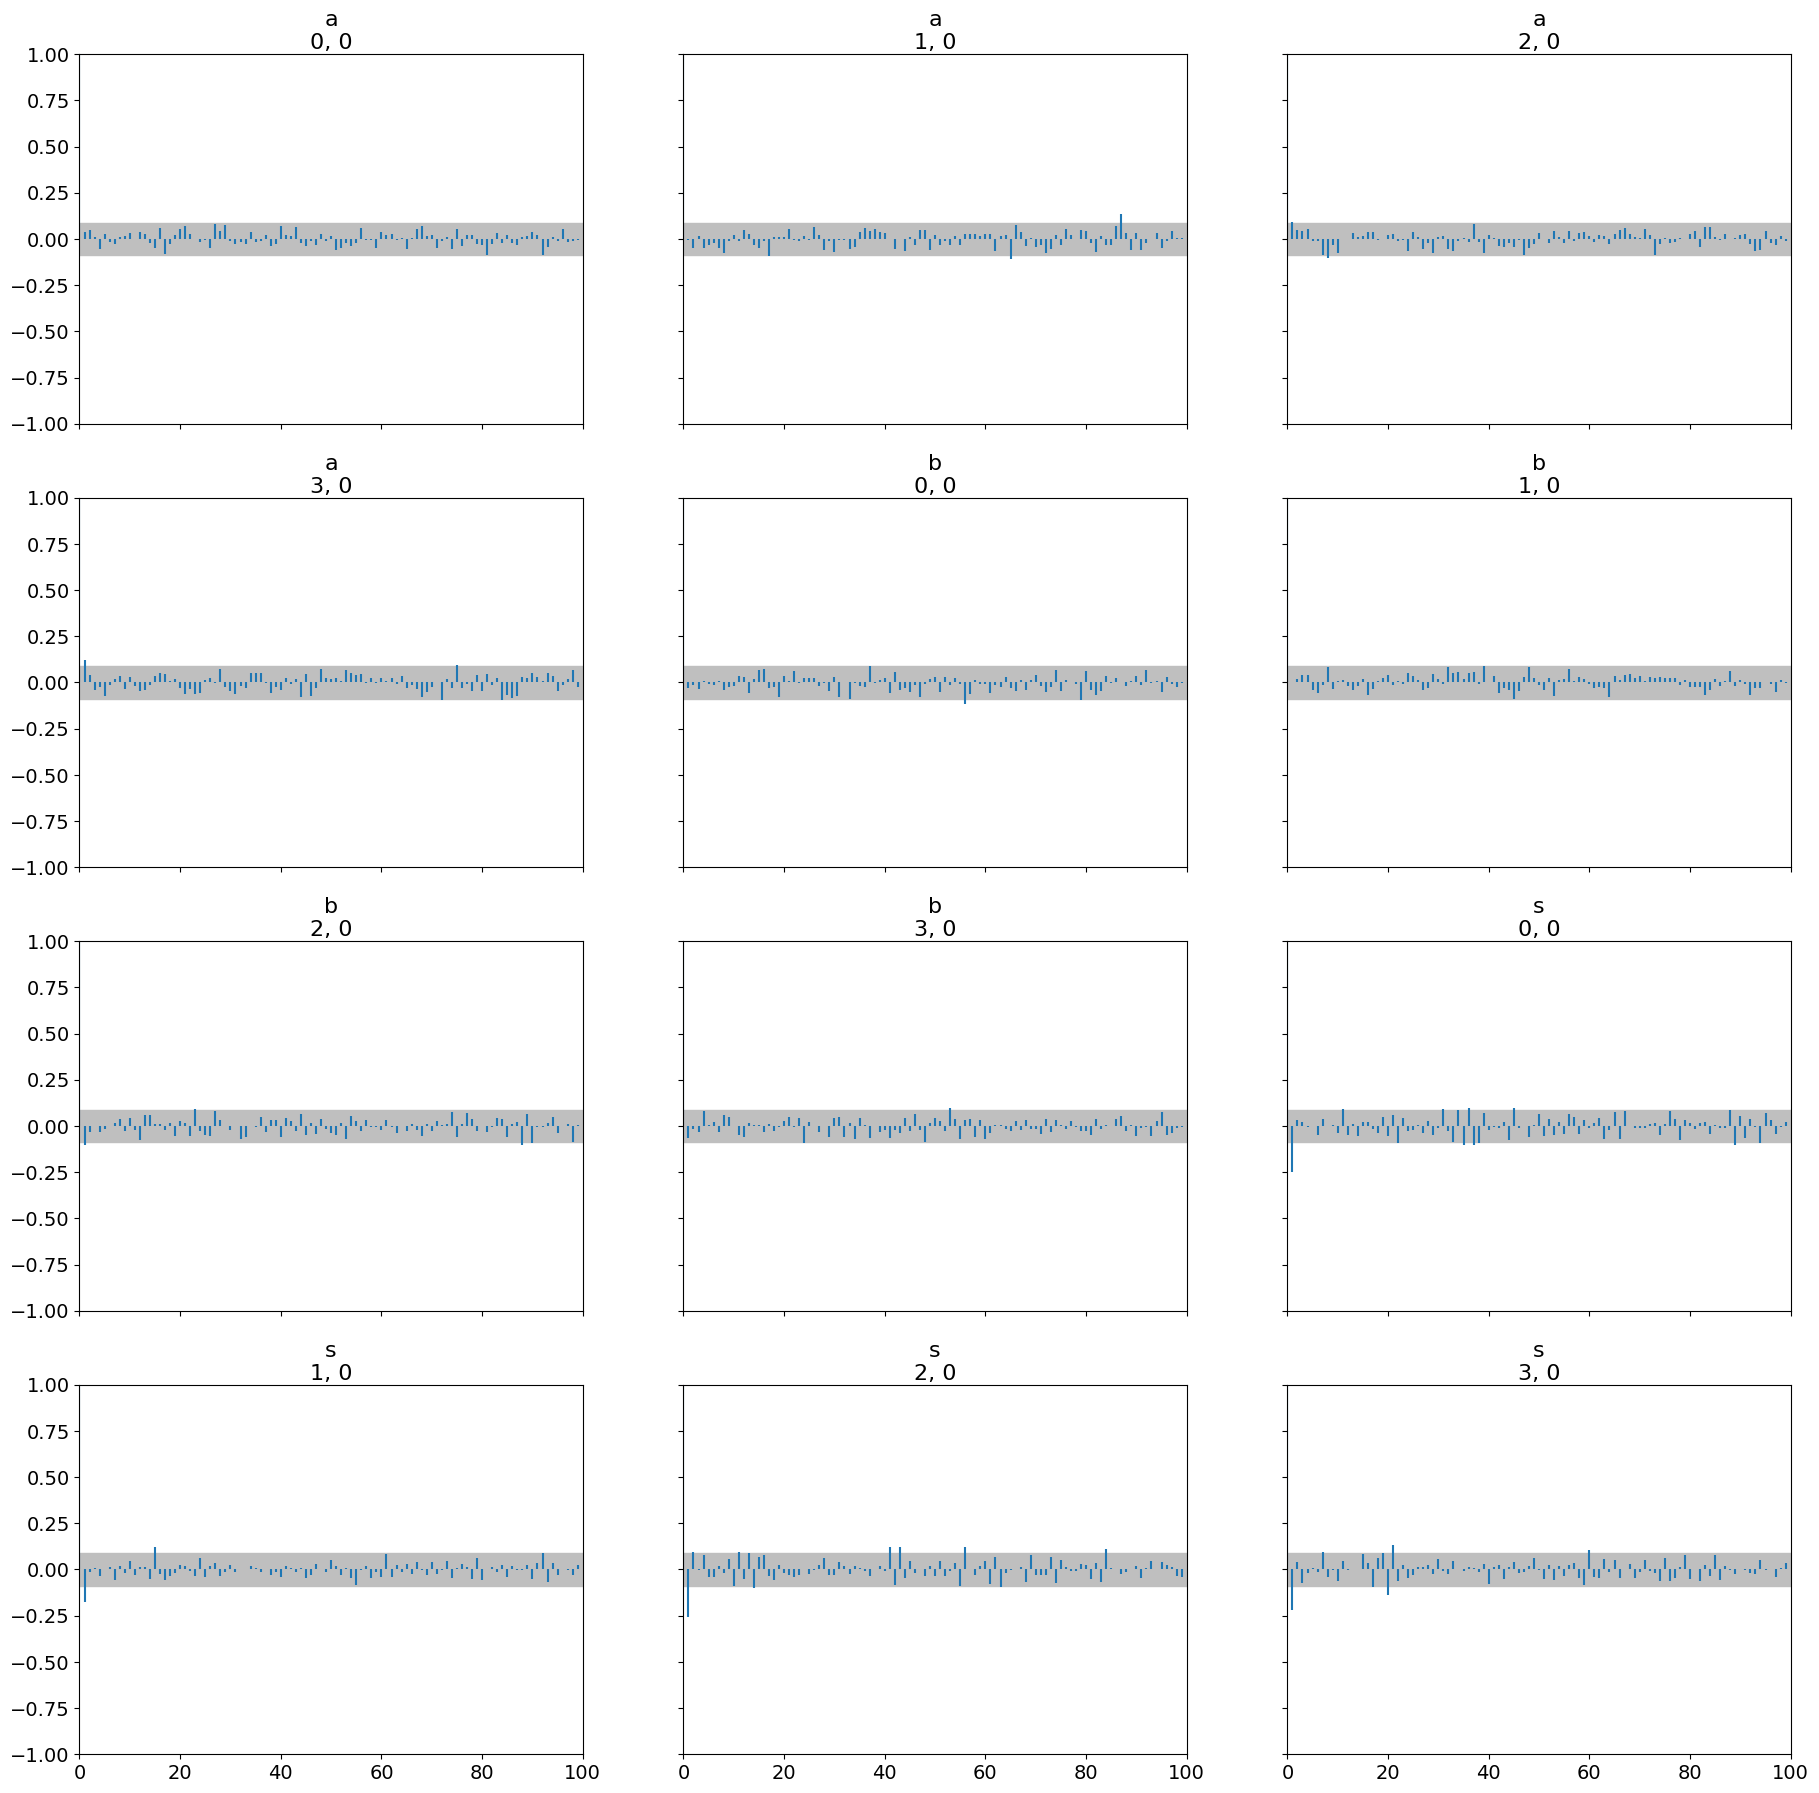

In [3]:
m.diag_autocor()

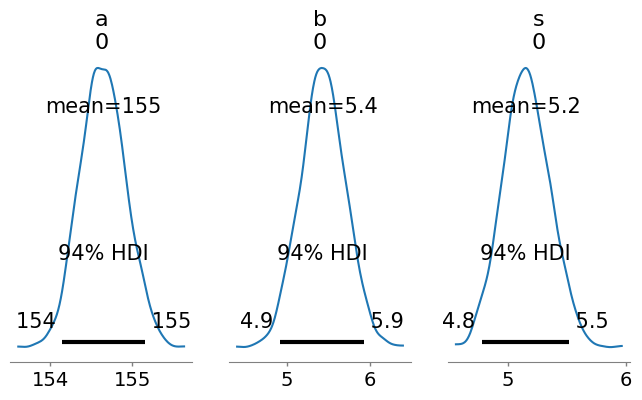

In [4]:
m.diag_posterior()

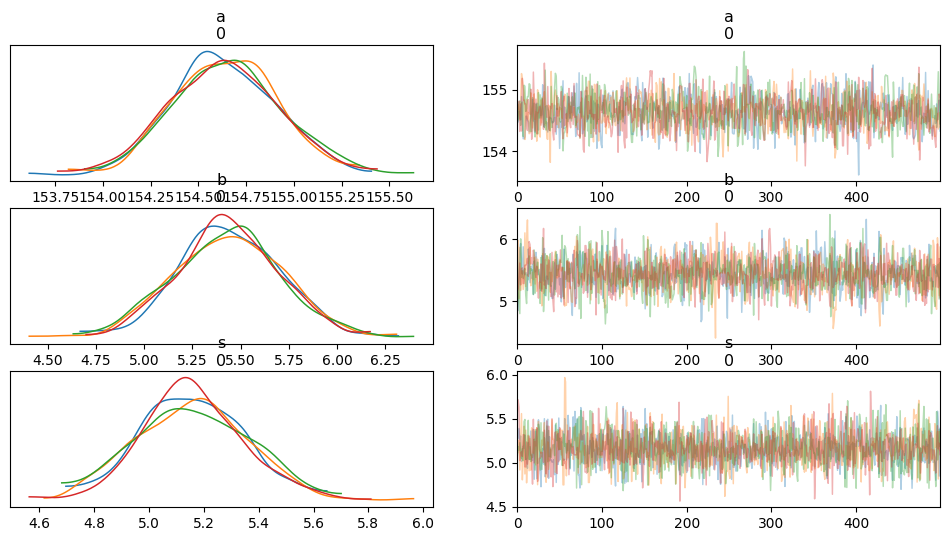

In [5]:
m.diag_traces()

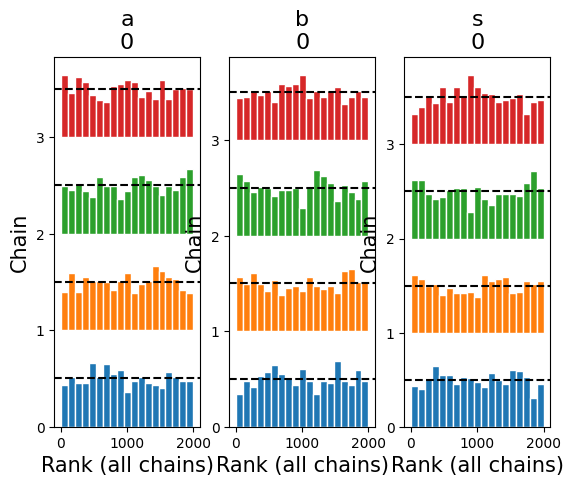

In [6]:
m.diag_rank()

array([<Axes: >, <Axes: title={'center': 'ess'}>], dtype=object)

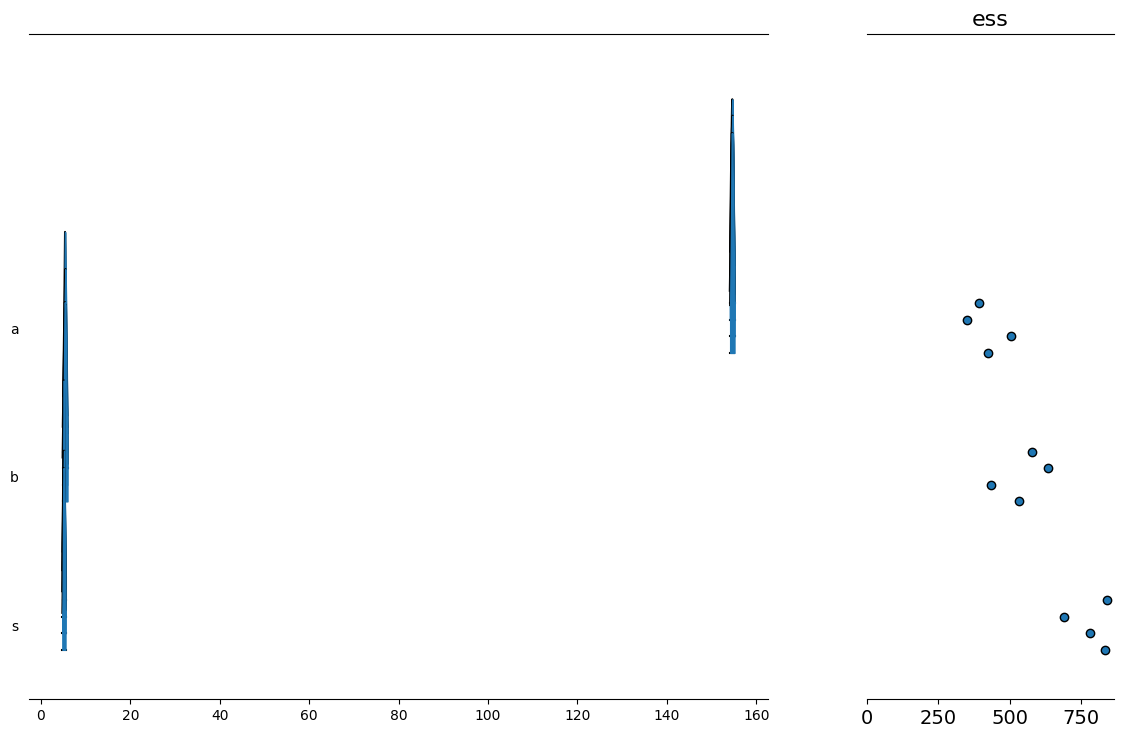

In [8]:
m.diag_forest()

array([[<Axes: ylabel='a\n0'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='b\n0'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='a\n0', ylabel='s\n0'>, <Axes: xlabel='b\n0'>,
        <Axes: xlabel='s\n0'>]], dtype=object)

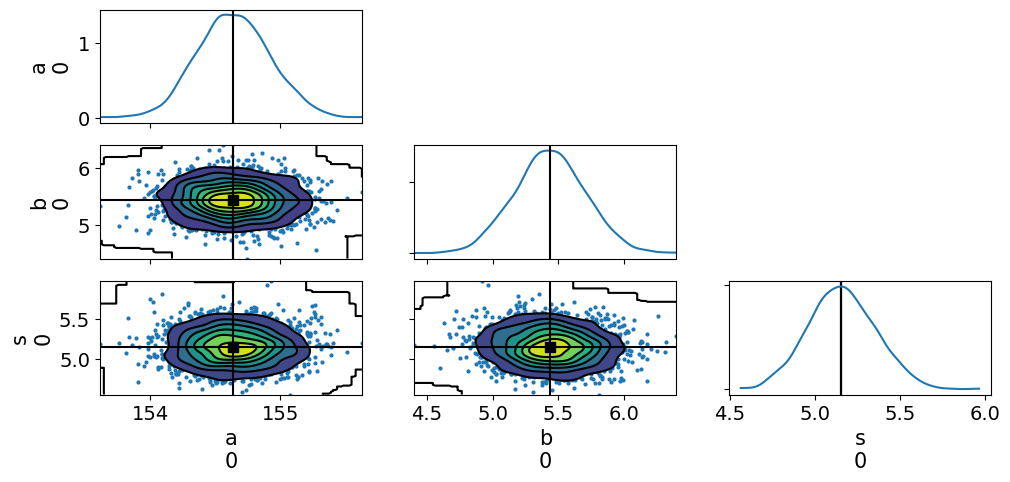

In [9]:
m.diag_pair()

array([[<Axes: title={'center': 'a\n0'}>,
        <Axes: title={'center': 'b\n0'}>,
        <Axes: title={'center': 's\n0'}>]], dtype=object)

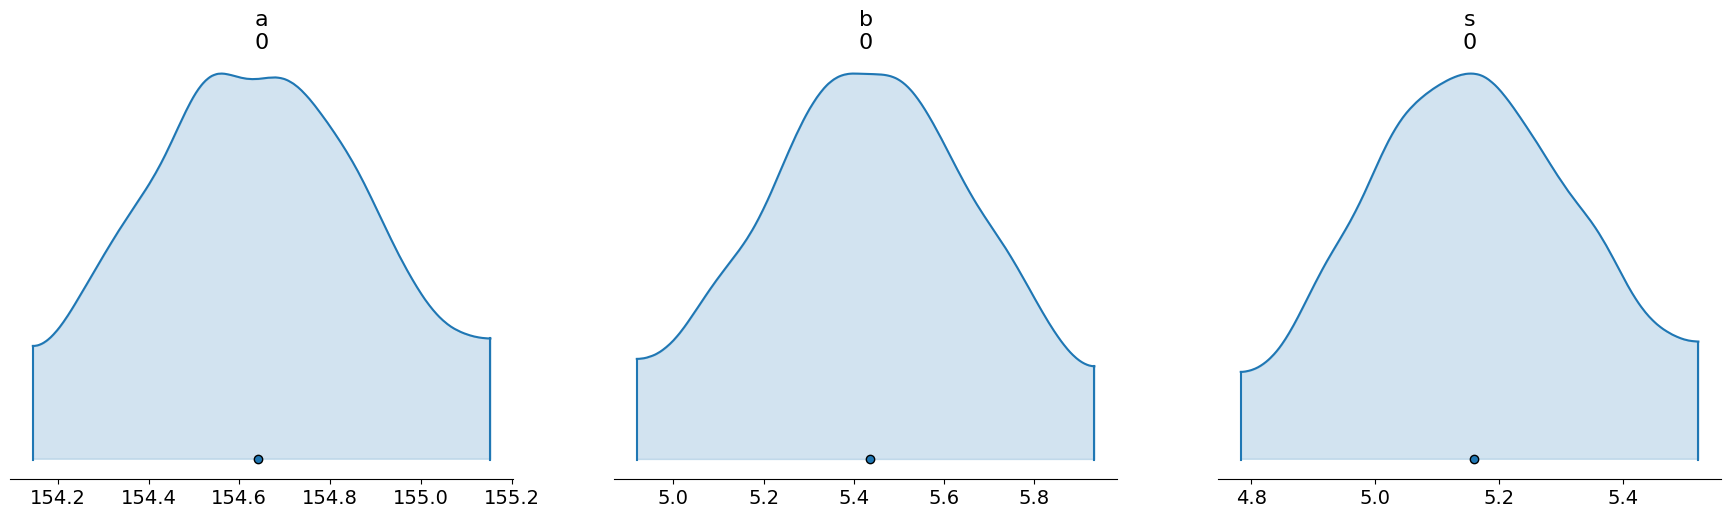

In [10]:
m.diag_density()

array([<Axes: title={'center': 'a\n0'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'b\n0'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 's\n0'}, xlabel='Total number of draws', ylabel='ESS'>],
      dtype=object)

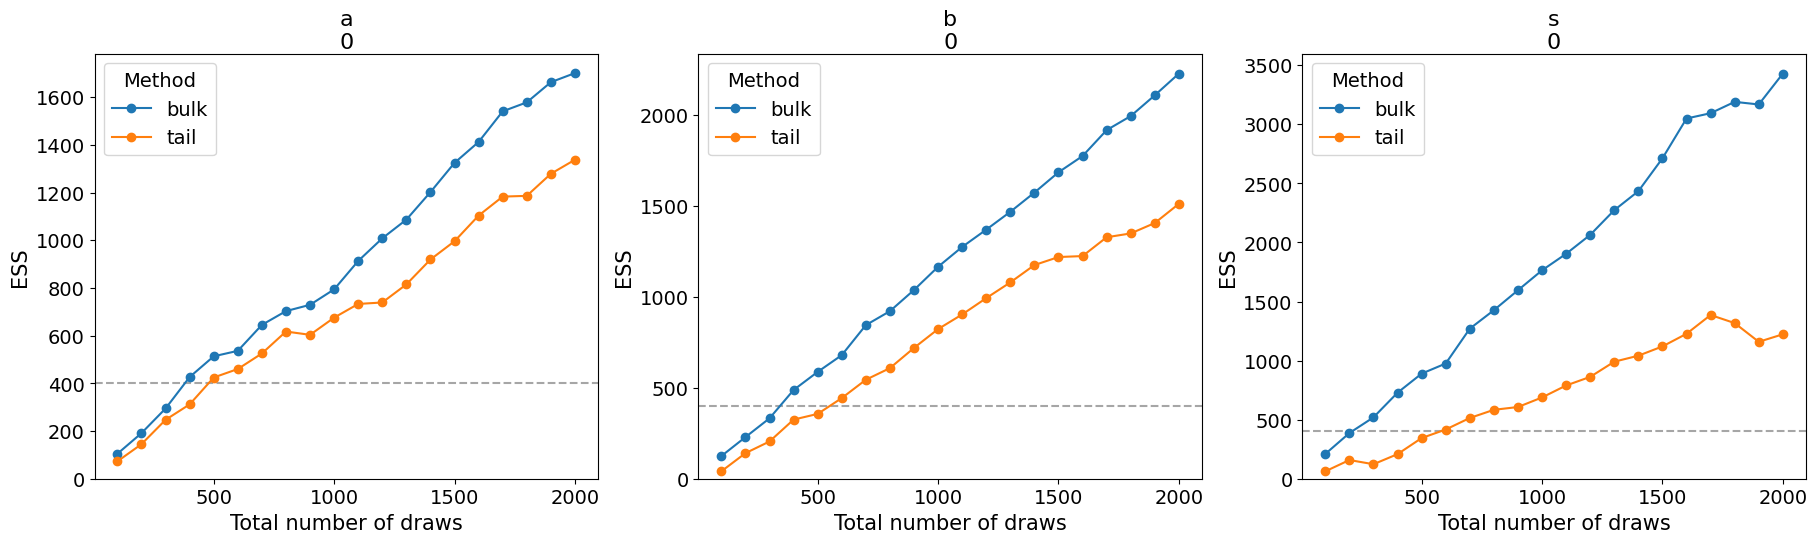

In [11]:
m.diag_plot_ess()